In [5]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', size=15)
plt.style.use('dark_background')


# get y-axis into readable units eg x / 100K infect >>> # normalize country-numbers by total countries population ??? > index
# plot dates eg only months
# overall numbers histogram > cross-check against other sources
# check how to "time the dashboard" to newly released data every day
# summarize basic stats eg, time-line, num countries etc.

# - Transfer days into calender week (eg for color coding over 2 years of pandemic [daily variations are artifacts])
# - Add metrics to board
# - read daframe from web?

# Overall static data

In [13]:
# Overall numbers
df = pd.read_csv("./data/corona_report_22-01-2022.csv")  # aggreated data
df.columns = [c.lower() for c in df.columns.tolist()]

print(df.columns.tolist()[:10])
df.head(5)

['fips', 'admin2', 'province_state', 'country_region', 'last_update', 'lat', 'long_', 'confirmed', 'deaths', 'recovered']


,fips,admin2,province_state,country_region,last_update,lat,long_,confirmed,deaths,recovered,active,combined_key,incident_rate,case_fatality_ratio
0,NaN,NaN,NaN,Afghanistan,2022-01-23 04:21:13,33.93911,67.709953,159548,7390,NaN,NaN,Afghanistan,409.850499,4.631835
1,NaN,NaN,NaN,Albania,2022-01-23 04:21:13,41.15330,20.168300,246412,3297,NaN,NaN,Albania,8562.513031,1.338003
2,NaN,NaN,NaN,Algeria,2022-01-23 04:21:13,28.03390,1.659600,234536,6481,NaN,NaN,Algeria,534.847027,2.763328
3,NaN,NaN,NaN,Andorra,2022-01-23 04:21:13,42.50630,1.521800,33025,144,NaN,NaN,Andorra,42742.509545,0.436033
4,NaN,NaN,NaN,Angola,2022-01-23 04:21:13,-11.20270,17.873900,95902,1886,NaN,NaN,Angola,291.794614,1.966591


In the following it is unclear how to deal with eg the United Kingdom, is it fair to group the data by country-region?

In [34]:
print(df.country_region.nunique())
df_ = df.sort_values(by="confirmed", ascending=False, ignore_index=True)
df_

196
0.7845769906497463


,fips,admin2,province_state,country_region,last_update,lat,long_,confirmed,deaths,recovered,active,combined_key,incident_rate,case_fatality_ratio
0,NaN,NaN,NaN,France,2022-01-23 04:21:13,46.227600,2.213700,16041383,125857,NaN,NaN,France,24575.639503,0.784577
1,NaN,NaN,England,United Kingdom,2022-01-23 04:21:13,52.355500,-1.174300,13413441,133762,NaN,NaN,"England, United Kingdom",23962.329306,0.997224
2,NaN,NaN,NaN,Turkey,2022-01-23 04:21:13,38.963700,35.243300,10881626,85784,NaN,NaN,Turkey,12902.236635,0.788338
3,NaN,NaN,NaN,Argentina,2022-01-23 04:21:13,-38.416100,-63.616700,7792652,119103,NaN,NaN,Argentina,17241.991437,1.528401
4,NaN,NaN,Maharashtra,India,2022-01-23 04:21:13,19.449759,76.108221,7466420,142071,NaN,NaN,"Maharashtra, India",6063.150847,1.902799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4001,80036.0,Out of NY,New York,US,2022-01-23 04:21:13,NaN,NaN,0,422,NaN,NaN,"Out of NY, New York, US",NaN,NaN
4002,80023.0,Out of ME,Maine,US,2020-08-07 22:34:20,NaN,NaN,0,0,NaN,NaN,"Out of ME, Maine, US",NaN,NaN
4003,90045.0,Unassigned,South Carolina,US,2022-01-23 04:21:13,NaN,NaN,0,0,NaN,NaN,"Unassigned, South Carolina, US",NaN,NaN
4004,90056.0,Unassigned,Wyoming,US,2022-01-23 04:21:13,NaN,NaN,0,0,NaN,NaN,"Unassigned, Wyoming, US",NaN,NaN


In [18]:
df[df.country_region == "US"].sum()

/var/folders/l1/s9h8bddx0mv1bqzrqffsxhp00000gn/T/ipykernel_17750/4163951379.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df.country_region == "US"].sum()


fips                                                         105902623.0
province_state         AlabamaAlabamaAlabamaAlabamaAlabamaAlabamaAlab...
country_region         USUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUS...
last_update            2022-01-23 04:21:132022-01-23 04:21:132022-01-...
lat                                                        121693.134039
long_                                                     -293352.619164
confirmed                                                       70495874
deaths                                                            865968
recovered                                                            0.0
active                                                               0.0
combined_key           Autauga, Alabama, USBaldwin, Alabama, USBarbou...
incident_rate                                            66856849.497173
case_fatality_ratio                                           5906.95365
dtype: object

Yes, start to group the regions:

In [36]:
df_ = df.groupby(by="country_region").sum()
df_ = df_.reset_index()

df_.confirmed.max()
# for incidnce rate and case fatal > use the mean value nstead of sum

70495874

In [37]:
all_confirmed = df_.confirmed.sum()  # for the delta value in the dashboard maybe use the time-series data and sum toegther all dates except for the most recent > diff() gives delta value
#all_recovered = df_.recovered.sum()
all_deaths = df_.deaths.sum()

print(all_confirmed, all_deaths)

349134552 5591704


In [38]:
mio_confirmed = all_confirmed / 1e6
mio_deaths = all_deaths / 1e6
prc_inf2death = np.round((100 / mio_confirmed) * mio_deaths, 1)

print(np.round(mio_confirmed, 1), np.round(mio_deaths, 1), prc_inf2death)

349.1 5.6 1.6


In [39]:
dfs = df_.sort_values(by="confirmed", ascending=False, ignore_index=True)
dfs


,country_region,fips,lat,long_,confirmed,deaths,recovered,active,incident_rate,case_fatality_ratio
0,US,105902623.0,121693.134039,-293352.619164,70495874,865968,0.0,0.0,6.685685e+07,5906.953650
1,India,0.0,831.177882,2945.020567,39237264,489409,0.0,0.0,1.730766e+05,41.935303
2,Brazil,0.0,-342.077100,-1308.973300,23931609,623191,0.0,0.0,3.498434e+05,62.835517
3,France,0.0,77.169695,-416.763414,16506090,129505,0.0,0.0,2.080020e+05,9.971383
4,United Kingdom,0.0,422.469698,-509.497466,15891905,154298,0.0,0.0,2.658816e+05,8.603558
...,...,...,...,...,...,...,...,...,...,...
191,Vanuatu,0.0,-15.376700,166.959200,7,1,0.0,0.0,2.391691e+00,14.285714
192,Marshall Islands,0.0,7.131500,171.184500,7,0,0.0,0.0,1.198363e+01,0.000000
193,Kiribati,0.0,-3.370400,-168.734000,2,0,0.0,0.0,1.700594e+00,0.000000
194,Micronesia,0.0,7.425600,150.550800,1,0,0.0,0.0,8.786188e-01,0.000000


Text(0, 0.5, 'Corona cases (count in millions)')

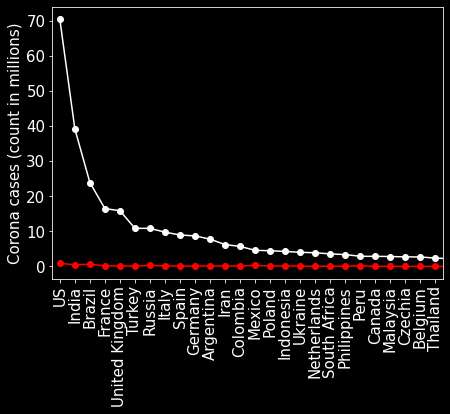

In [50]:
country_sorted = dfs["country_region"].values
confirmed_sorted = dfs["confirmed"].values
deaths_sorted = dfs["deaths"].values

show = 25
plt.figure(figsize=(7,5))
plt.plot(country_sorted, confirmed_sorted / 1e6, "wo-", label="confirmed cases")
# plot on seperate y-axis
plt.plot(country_sorted, deaths_sorted / 1e6, "ro-", label="deaths")

plt.xlim([-0.5, show + .5])
plt.xticks(rotation=90);
plt.ylabel("Corona cases (count in millions)")

Text(0, 0.5, 'Corona cases (count in millions)')

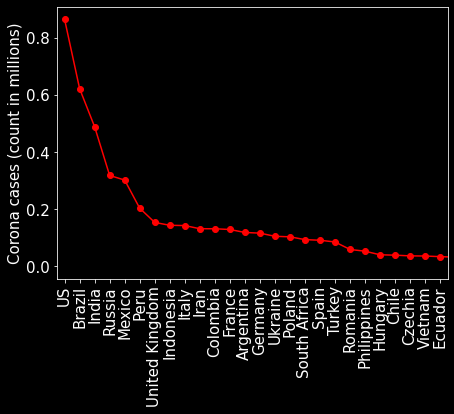

In [52]:
dfs = df_.sort_values(by="deaths", ascending=False, ignore_index=True)

country_sorted = dfs["country_region"].values
confirmed_sorted = dfs["confirmed"].values
deaths_sorted = dfs["deaths"].values

show = 25
plt.figure(figsize=(7,5))
plt.plot(country_sorted, deaths_sorted / 1e6, "ro-", label="deaths")

plt.xlim([-0.5, show + .5])
plt.xticks(rotation=90);
plt.ylabel("Corona deaths (count in millions)")

# Time series data

In [66]:
df = pd.read_csv("./data/corona_confirmed_ts_22-01-2022.csv", parse_dates=True)  # infection data

df = df.rename(columns={
    "Country/Region" : "country",
    "Province/State" : "state"})

print(df.columns.tolist()[:10])
df.head(5)


['state', 'country', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20']


,state,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,158602,158639,158678,158717,158826,158974,159070,159303,159516,159548
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,226598,228777,230940,232637,233654,236486,239129,241512,244182,246412
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,224383,224979,225484,226057,226749,227559,228918,230470,232325,234536
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,28899,29888,29888,29888,29888,29888,29888,32201,33025,33025
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,92581,93302,93524,93694,93974,94275,94779,95220,95676,95902


In [67]:
ts_min = 4  # measurements begin
t = df.columns.tolist()[ts_min:]
ts_total = len(t)
print("number of days recorded:", ts_total)

number of days recorded: 732


In [75]:
x = pd.date_range(start='1/22/2020', end='1/22/2022', freq="W") # weekly as in mo-so
x = pd.date_range(start='1/22/2020', end='1/22/2022', freq="7D") # accurate

x
# now use them to integrate the values

DatetimeIndex(['2020-01-22', '2020-01-29', '2020-02-05', '2020-02-12',
               '2020-02-19', '2020-02-26', '2020-03-04', '2020-03-11',
               '2020-03-18', '2020-03-25',
               ...
               '2021-11-17', '2021-11-24', '2021-12-01', '2021-12-08',
               '2021-12-15', '2021-12-22', '2021-12-29', '2022-01-05',
               '2022-01-12', '2022-01-19'],
              dtype='datetime64[ns]', length=105, freq='7D')

In [55]:
print("countries with additional state information:", df.country[df.state.notna()].nunique(), "\n", df.country[df.state.notna()].unique())
print("total number of countries:", df.country.nunique())

countries with additional state information: 8 
 ['Australia' 'Canada' 'China' 'Denmark' 'France' 'Netherlands'
 'New Zealand' 'United Kingdom']
total number of countries: 196


# Overall corona numbers >>> THIS HAS TO BE CORRCTED ITS NOT OVERALL NUMBERS

In [56]:
dfg = df.groupby(by="country").sum()
dfg_ = dfg.reset_index()

# State pooled, time-integrated numbers
dfg_["cases"] = dfg_.loc[:, t].sum(axis=1)

# All cases summed across countries
cases_t = dfg_.loc[:, t].sum(axis=0)

In [65]:
print(dfg_.loc[:, t[-1]].sum())
dfg_.loc[:, t[-1]].sum() - dfg_.loc[:, t[-2]].sum()

349134552


2670248

In [62]:
dfg_.loc[dfg_.country == "US", t[-1]]

182    70495874
Name: 1/22/22, dtype: int64

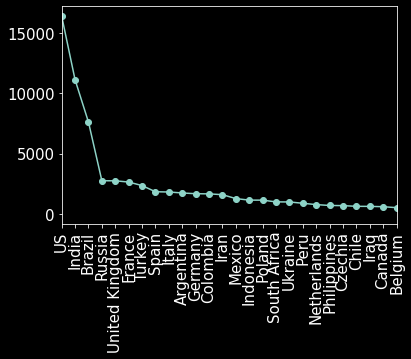

In [58]:
# This here is wrong because its based on the running aggregation of cases

country_sorted = dfg_.sort_values(by="cases", ascending=False)["country"]
cases_sorted = dfg_.sort_values(by="cases", ascending=False)["cases"]

show = 25
plt.figure()
plt.plot(country_sorted, cases_sorted / 1e6, "o-")
plt.xlim([0, show])
plt.xticks(rotation=90);

## Time series of corona cases in germany

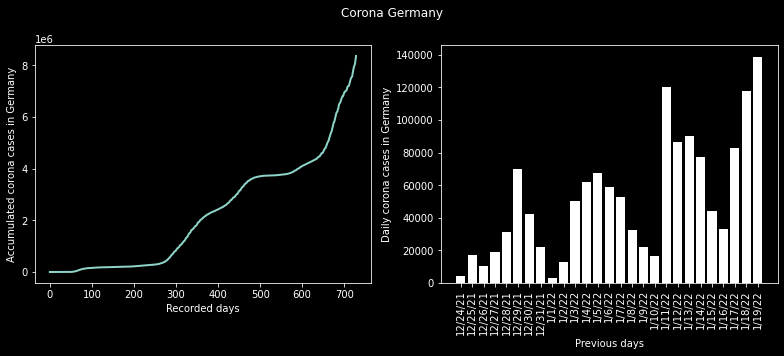

In [103]:
# country idx
dfg = dfg.reset_index()
idx = dfg[dfg.country == "Germany"].index.tolist()
y = np.squeeze(dfg.loc[idx, t].values)

plt.figure(figsize=(11,5))
plt.subplot(121)
plt.suptitle("Corona Germany")

plt.plot(y, lw=2)
plt.xlabel("Recorded days")
plt.ylabel("Accumulated corona cases in Germany")

prev = 28 # previous days to show
y2 = y / 10
y2 = y[-prev:]
x2 = t[-prev+1:]  # have same n_elem as y

plt.subplot(122)
plt.bar(x2, np.diff(y2), color="w")
plt.xlabel("Previous days")
plt.ylabel("Daily corona cases in Germany")
plt.xticks(rotation=90);
plt.tight_layout()

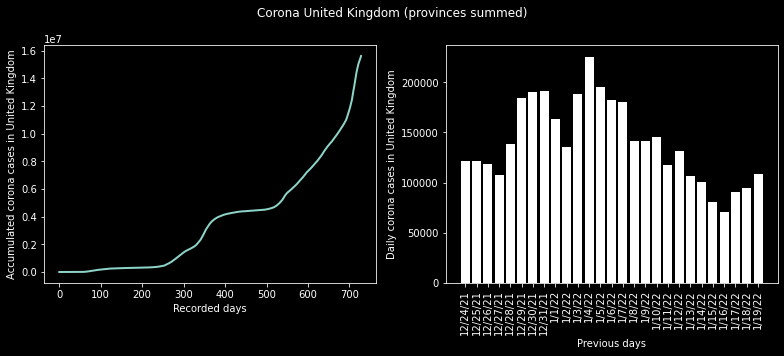

In [109]:
# country idx
#dfg = df.groupby(by="country").sum()
#dfg = dfg.reset_index()
cname = "United Kingdom"
idx = dfg[dfg.country == cname].index.tolist()
y = np.squeeze(dfg.loc[idx, t].values)


plt.figure(figsize=(11,5))
plt.subplot(121)
plt.suptitle(f"Corona {cname} (provinces summed)")

plt.plot(y, lw=2)
plt.xlabel("Recorded days")
plt.ylabel(f"Accumulated corona cases in {cname}")

prev = 28 # previous days to show
y2 = y / 10
y2 = y[-prev:]
x2 = t[-prev+1:]  # have same n_elem as y

plt.subplot(122)
plt.bar(x2, np.diff(y2), color="w")

plt.xlabel("Previous days")
plt.ylabel(f"Daily corona cases in {cname}")
plt.xticks(rotation=90);
plt.tight_layout()

# Times series of several countries in comparison
the problem here is the fucking legend! the data doesnt match to the line color > investigate or change and plot multiple via color
## Ok solved that > clean up

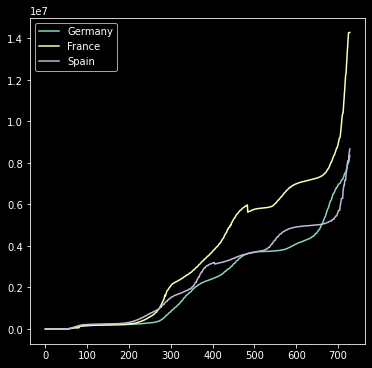

In [132]:

clist = ["Germany", "France", "Spain"]
tss = list()
for c in clist:
    idx = dfg[(dfg["country"] == c)].index.tolist()
    tss.append(np.squeeze(dfg.loc[idx, t].values))

tss = np.array(tss).T

plt.figure(figsize=(6, 6))
plt.plot(tss, '-') #plt.plot(ys[:, n], '-', label=ccountry)
plt.legend(clist)

# this down here works
# col_ = ["w", "r", "b", "m", "grey"] 
# plt.figure(figsize=(6, 6))
# for n, ccountry in enumerate(clist):
#     plt.plot(tss[:, n], '-', color=col_[n], label=ccountry) #plt.plot(ys[:, n], '-', label=ccountry)
#     print(ccountry)
# plt.legend()

[62, 66] 62     France
66    Germany
Name: country, dtype: object
Germany
France


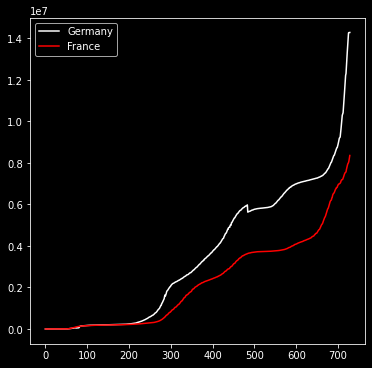

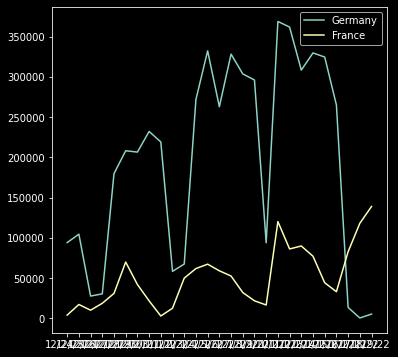

In [112]:
# Group by country / ignore states for now
dfg = df.groupby(by="country").sum()
dfg = dfg.reset_index()

# Or shortlist
clist = ["Germany", "France"] # "India", "US" # "China", "Indonesia", chinas provices might be interesting
nth = [nth for nth, c in enumerate(dfg["country"].tolist()) if c in clist]
print(nth, dfg.loc[nth, "country"])

# for c in clist:
#     idx = dfg[dfg.country == c].index.tolist()
#     print(idx)
#y = np.squeeze(dfg.loc[idx, t].values)

# Get data
ys = dfg.loc[nth, t].T.values

col_ = ["w", "r", "b", "m", "grey"] 
plt.figure(figsize=(6, 6))
for n, ccountry in enumerate(clist):
    plt.plot(ys[:, n], '-', color=col_[n], label=ccountry) #plt.plot(ys[:, n], '-', label=ccountry)
    print(ccountry)
plt.legend()

# prev = 28 # previous days to show
# ys2 = ys / 10
# ys2 = ys[-prev:]
# x2 = t[-prev+1:]  # have same n_elem as y

# plt.figure(figsize=(6, 6))
# for n, ccountry in enumerate(clist):
#     plt.plot(x2, np.diff(ys2[:, n], axis=0), '-', label=ccountry)
# plt.legend()


In [ ]:
# time from till, xvec, num_xvec
country_sum = df.iloc[:, 4:].sum(axis=1)

plt.figure()
plt.plot(country_sum)

In [ ]:
df.loc[country_sum > 1e10, "country"]

In [ ]:
df_.loc[country_sum > 1e10]

In [ ]:
country_sum = df_.iloc[:, 4:].sum(axis=1)
#print(df_.loc[country_sum > 1e10])

plt.figure()
plt.plot(country_sum)

In [ ]:
clist in df_.index

In [ ]:
df_ = df.groupby(by="country").mean()
df_ = df_.reset_index()
df_

In [ ]:
# Group by country / ignore states for now
df.country[df.state.notna()]

# this is now another df w/o state info
df_ = df.groupby(by="country").mean()
df_ = df_.reset_index()

# Or shortlist
clist = ["Germany", "India", "US", "Spain", "Italy"]  # "China", "Indonesia", chinas provices might be interesting
nth = [nth for nth, c in enumerate(df_["country"].tolist()) if c in clist]
print(nth, df_.loc[nth, "country"])

# Get data
ys = df_.iloc[nth, 4:].T
#ys = df_.iloc[clist in df_["country"], 4:].T
print(ys.shape)

plt.figure(figsize=(6, 6))
plt.plot(ys, '--')
plt.legend(clist)


In [ ]:
df_[df_.country == "Germany"]

In [ ]:
ts_min = 4
x_t = df.columns.tolist()[ts_min:]
ts_total = len(x_t)

# country idx
idx = df[df.country == "Germany"].index.tolist()
y = df.loc[idx, x_t]

plt.figure()
plt.plot(x_t, y)

In [ ]:
x = np.array([x_.split("/")[::-1] for x_ in x_t]).astype("int")
x = np.array([x_.split("/") for x_ in x_t]).astype("int")
#x[:,0] = x[:, 0]+2000
x

In [ ]:
x[0]

In [ ]:
dt = datetime.date(x[0, 2], x[0, 0], x[0, 1])
dt
dt.strftime("%b")

In [ ]:
idx = [0,1]
y = df.loc[idx, x_t].T.values
y


In [ ]:
plt.figure()
plt.plot(y)